In [71]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

dirpath = os.getcwd()
print(dirpath)

sns.set(rc={'figure.figsize':(11.7,8.27)})

/Users/luciananieto/2021/Planet_2021/Codes/Python


In [72]:
df = pd.read_csv ("/Users/luciananieto/2021/Planet_2021/Planet_Indices_Weather/Planet_full_2017-ck/Matchiing-dates-ck/2017-ck-finalDataset.csv")

### Data cleaning

In [43]:
df.columns

Index(['Unnamed: 0', 'B1', 'B2', 'B3', 'B4', 'CVI', 'EVI', 'FID_1', 'GCVI',
       'ID', 'NDVI', 'NGI', 'Q1', 'Q2', 'Q3', 'Q4', 'Shape_Area', 'Shape_Le_1',
       'Shape_Leng', 'stage', 'constant', 'crop', 'latitude', 'longitude',
       'pr', 'tmmn', 'tmmx', 'vpd', 'year', '.geo'],
      dtype='object')

In [44]:
df= df.drop (['Unnamed: 0', 'Shape_Area', 'Shape_Leng', 'Shape_Le_1','FID_1','crop','.geo'], axis=1)

In [45]:
df.columns

Index(['B1', 'B2', 'B3', 'B4', 'CVI', 'EVI', 'GCVI', 'ID', 'NDVI', 'NGI', 'Q1',
       'Q2', 'Q3', 'Q4', 'stage', 'constant', 'latitude', 'longitude', 'pr',
       'tmmn', 'tmmx', 'vpd', 'year'],
      dtype='object')

In [46]:
df.describe(include='all')

,B1,B2,B3,B4,CVI,EVI,GCVI,ID,NDVI,NGI,...,Q4,stage,constant,latitude,longitude,pr,tmmn,tmmx,vpd,year
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,...,783.000000,783,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,R5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,565.277442,798.408282,901.418499,3628.625464,4.876785,1.589054,11.711090,7036.538953,0.604165,0.147111,...,-502.120774,NaN,184.158365,37.802735,-98.802727,2.301906,289.864638,304.040861,1.591905,2017.0
std,242.395015,293.289768,518.988107,569.918886,1.154355,0.724565,6.618991,1730.970840,0.212113,0.042723,...,504.617542,NaN,31.656936,0.048818,0.075011,6.380216,4.008449,4.869773,0.648921,0.0
min,230.162240,388.518416,216.348578,1944.097861,2.989037,0.396887,2.994897,2337.000000,0.212369,0.078894,...,-999.000000,NaN,118.000000,37.732180,-98.926905,0.000000,276.000000,288.899994,0.110000,2017.0
25%,358.867233,539.736308,457.092236,3160.408062,3.716925,0.822712,4.999234,6440.000000,0.391257,0.105909,...,-999.000000,NaN,159.000000,37.767979,-98.853719,0.000000,288.086905,301.700012,1.080000,2017.0
50%,471.065251,687.153559,663.513124,3568.566969,4.935410,1.796066,11.209762,7226.000000,0.681435,0.137666,...,-999.000000,NaN,184.000000,37.795543,-98.807908,0.000000,290.100006,304.064199,1.590000,2017.0
75%,783.800061,1070.044964,1366.195267,4133.876790,5.827865,2.250079,18.186318,8203.000000,0.794133,0.191860,...,4.000000,NaN,206.000000,37.819452,-98.733645,0.490312,292.620606,308.210676,1.930000,2017.0


In [47]:
#df.sort_values(by=['constant'])
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import plot_tree
from sklearn import metrics

In [48]:
df['stage'].value_counts()

R5     65
VE     62
R1     58
R3     51
R4     49
V6     42
VT     38
V4     37
R2     35
V8     32
V1     31
V7     30
V5     29
V2     29
R6     27
V3     27
V12    26
V9     25
V10    24
V13    22
V11    22
V15    20
V16     1
V14     1
Name: stage, dtype: int64

In [49]:
#sns.boxplot(y='constant', x='stage', data=df, order=['V8', 'V9','V10','V11','V12','V13','V14','V15','V16','V18','V19','VT','R1','R2','R3','R4','R5','R6'])

In [50]:
#f, ax = plt.subplots(figsize=(20, 18))
#corr = df.corr()
#sns.heatmap(corr,
#            xticklabels=corr.columns.values,
#            yticklabels=corr.columns.values,
#            annot=True, fmt=".2f")

### Data normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler

#scaled_features = df.copy()


In [52]:
col_names = ['NGI', 'CVI', 'EVI','GCVI', 'NDVI']

features = df[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

In [53]:
df[col_names] = features
print(df[col_names])

          NGI       CVI       EVI      GCVI      NDVI
0    0.653405  0.251997  0.381383  0.169288  0.469060
1    0.718984  0.214612  0.290559  0.128465  0.380633
2    0.869690  0.110868  0.122110  0.048363  0.170529
3    0.519540  0.322422  0.527834  0.268184  0.619363
4    0.493048  0.335738  0.571011  0.302815  0.624869
..        ...       ...       ...       ...       ...
778  0.865337  0.132607  0.057711  0.044229  0.107156
779  0.909575  0.090915  0.027184  0.024315  0.056861
780  0.917946  0.078768  0.038115  0.023608  0.068605
781  0.921246  0.075491  0.038072  0.022636  0.067921
782  0.942390  0.045377  0.066465  0.023206  0.093144

[783 rows x 5 columns]


In [54]:
df.columns

Index(['B1', 'B2', 'B3', 'B4', 'CVI', 'EVI', 'GCVI', 'ID', 'NDVI', 'NGI', 'Q1',
       'Q2', 'Q3', 'Q4', 'stage', 'constant', 'latitude', 'longitude', 'pr',
       'tmmn', 'tmmx', 'vpd', 'year'],
      dtype='object')

In [55]:
#rearange colummns 


df = df[['stage','B1', 'B2', 'B3', 'B4',  
         'Q1','Q2', 'Q3', 'Q4',
         'CVI', 'EVI', 'GCVI', 'NDVI', 'NGI',  
         'pr', 'tmmn', 'tmmx', 'vpd',
         'ID','constant',  'latitude', 'longitude',
       'year']]

In [56]:
df.columns

Index(['stage', 'B1', 'B2', 'B3', 'B4', 'Q1', 'Q2', 'Q3', 'Q4', 'CVI', 'EVI',
       'GCVI', 'NDVI', 'NGI', 'pr', 'tmmn', 'tmmx', 'vpd', 'ID', 'constant',
       'latitude', 'longitude', 'year'],
      dtype='object')

# all variables

### Random Forest version 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [58]:
X= df.iloc[:,1:23]
Y = df.iloc[:,0]
print (X)
print(Y)

             B1           B2           B3           B4          Q1        Q2  \
0    695.722810   966.814111  1093.266128  3591.616557  100.000000  1.000000   
1    727.298601   993.818057  1192.066592  3326.428871  100.000000  1.000000   
2    951.262402  1229.910291  1638.803122  3245.444667  100.000000  1.000000   
3    511.549196   761.775381   772.130056  3449.250744   72.735583  0.567850   
4    583.716868   837.176881   870.170742  3819.637504   96.816309  0.948040   
..          ...          ...          ...          ...         ...       ...   
778  864.798231  1171.614783  1673.723634  2976.132725  100.000000  2.000000   
779  929.028164  1250.904097  1808.040756  2969.409872    4.309029  0.005791   
780  919.422755  1226.083870  1734.990455  2922.313090    1.005232  0.000000   
781  909.971475  1212.974999  1715.868459  2879.202835    3.304668  0.000000   
782  865.850153  1140.128884  1540.123817  2699.897713    1.000000  0.000000   

             Q3     Q4       CVI       

In [59]:
seed = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [60]:
clf_RF=RandomForestClassifier(bootstrap=True,
 #max_depth=50,
 #max_features= 7,
 #min_samples_leaf= 2,
 #min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_rf = clf_RF.predict(X_test)

y_pred2_rf = clf_RF.predict(X_train)

report = metrics.classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
#report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_RF_all.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred_rf)

print(cm)


              precision    recall  f1-score    support
R1             0.428571  0.473684  0.450000   19.00000
R2             0.428571  0.600000  0.500000    5.00000
R3             0.875000  0.636364  0.736842   11.00000
R4             0.666667  0.888889  0.761905    9.00000
R5             0.888889  0.888889  0.888889   18.00000
R6             0.909091  0.833333  0.869565   12.00000
V1             0.125000  0.142857  0.133333    7.00000
V10            0.333333  0.285714  0.307692    7.00000
V11            0.166667  0.100000  0.125000   10.00000
V12            0.500000  0.100000  0.166667   10.00000
V13            0.111111  0.166667  0.133333    6.00000
V15            0.250000  0.285714  0.266667    7.00000
V16            0.000000  0.000000  0.000000    1.00000
V2             0.250000  0.142857  0.181818    7.00000
V3             0.400000  0.666667  0.500000    6.00000
V4             0.555556  0.416667  0.476190   12.00000
V5             0.214286  0.375000  0.272727    8.00000
V6        

/Users/luciananieto/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using only VI (5)

In [63]:
Xvw= df.iloc[:,[9,10,11,12,13]]
Yvw = df.iloc[:,0]
print (Xvw)

          CVI       EVI      GCVI      NDVI       NGI
0    0.251997  0.381383  0.169288  0.469060  0.653405
1    0.214612  0.290559  0.128465  0.380633  0.718984
2    0.110868  0.122110  0.048363  0.170529  0.869690
3    0.322422  0.527834  0.268184  0.619363  0.519540
4    0.335738  0.571011  0.302815  0.624869  0.493048
..        ...       ...       ...       ...       ...
778  0.132607  0.057711  0.044229  0.107156  0.865337
779  0.090915  0.027184  0.024315  0.056861  0.909575
780  0.078768  0.038115  0.023608  0.068605  0.917946
781  0.075491  0.038072  0.022636  0.067921  0.921246
782  0.045377  0.066465  0.023206  0.093144  0.942390

[783 rows x 5 columns]


In [64]:
#XGBoost

# split data into train and test sets
seed = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(Xvw, Yvw, test_size=test_size, random_state=seed)

print(X_train)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

report = metrics.classification_report(y_test,y_pred, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
#report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_XG_only_W.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred)

print(cm)

          CVI       EVI      GCVI      NDVI       NGI
563  0.479044  0.684746  0.436583  0.769737  0.334236
11   0.335362  0.458155  0.227479  0.559083  0.560384
214  0.179894  0.467436  0.197115  0.559141  0.639898
88   0.255267  0.343676  0.188858  0.395252  0.657300
639  0.583093  0.705144  0.509459  0.796819  0.276783
..        ...       ...       ...       ...       ...
715  0.556463  0.655795  0.547378  0.733529  0.288595
767  0.338883  0.449206  0.235299  0.546774  0.557018
72   0.275572  0.370395  0.225123  0.440561  0.627177
235  0.853550  0.836423  0.841622  0.897162  0.096396
37   0.155506  0.139211  0.068646  0.217878  0.821304

[548 rows x 5 columns]


NameError: name 'XGBClassifier' is not defined

In [65]:
# split data into train and test sets
seed = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(Xvw, Yvw, test_size=test_size, random_state=seed)


#Random Forest
clf_RF=RandomForestClassifier(bootstrap=True,
                              #max_depth=50,
 #max_features= 7,
 #min_samples_leaf= 2,
 #min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(X_train, y_train)

print(X_train)
y_pred_rf = clf_RF.predict(X_test)

report = metrics.classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
#report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_RF_sentinel_match.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred_rf)

print(cm)




          CVI       EVI      GCVI      NDVI       NGI
563  0.479044  0.684746  0.436583  0.769737  0.334236
11   0.335362  0.458155  0.227479  0.559083  0.560384
214  0.179894  0.467436  0.197115  0.559141  0.639898
88   0.255267  0.343676  0.188858  0.395252  0.657300
639  0.583093  0.705144  0.509459  0.796819  0.276783
..        ...       ...       ...       ...       ...
715  0.556463  0.655795  0.547378  0.733529  0.288595
767  0.338883  0.449206  0.235299  0.546774  0.557018
72   0.275572  0.370395  0.225123  0.440561  0.627177
235  0.853550  0.836423  0.841622  0.897162  0.096396
37   0.155506  0.139211  0.068646  0.217878  0.821304

[548 rows x 5 columns]
              precision    recall  f1-score     support
R1             0.166667  0.157895  0.162162   19.000000
R2             0.181818  0.400000  0.250000    5.000000
R3             0.333333  0.181818  0.235294   11.000000
R4             0.388889  0.777778  0.518519    9.000000
R5             0.421053  0.444444  0.432432   18

/Users/luciananieto/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# split data into train and test sets
seed = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(Xvw, Yvw, test_size=test_size, random_state=seed)


#Random Forest
clf_RF=RandomForestClassifier(bootstrap=True,
                              #max_depth=50,
 #max_features= 7,
 #min_samples_leaf= 2,
 #min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(X_train, y_train)

print(X_train)
y_pred_rf = clf_RF.predict(X_test)

report = metrics.classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
#report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_RF_only_W.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred_rf)

print(cm)




          CVI       EVI      GCVI      NDVI       NGI
563  0.479044  0.684746  0.436583  0.769737  0.334236
11   0.335362  0.458155  0.227479  0.559083  0.560384
214  0.179894  0.467436  0.197115  0.559141  0.639898
88   0.255267  0.343676  0.188858  0.395252  0.657300
639  0.583093  0.705144  0.509459  0.796819  0.276783
..        ...       ...       ...       ...       ...
715  0.556463  0.655795  0.547378  0.733529  0.288595
767  0.338883  0.449206  0.235299  0.546774  0.557018
72   0.275572  0.370395  0.225123  0.440561  0.627177
235  0.853550  0.836423  0.841622  0.897162  0.096396
37   0.155506  0.139211  0.068646  0.217878  0.821304

[548 rows x 5 columns]
              precision    recall  f1-score     support
R1             0.166667  0.157895  0.162162   19.000000
R2             0.181818  0.400000  0.250000    5.000000
R3             0.333333  0.181818  0.235294   11.000000
R4             0.388889  0.777778  0.518519    9.000000
R5             0.421053  0.444444  0.432432   18

/Users/luciananieto/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, landsat_NDVI+3Weather
[[ 3  3  3  3  3  1  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 2  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  0  2  8  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  1  9  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  2  1  1  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0  1  1  0  1  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0  2  0  0  0  0  0  1  0  1  3  0  0]
 [ 1  0  0  0  2  0  0  1  2  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  1  0  2  1  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

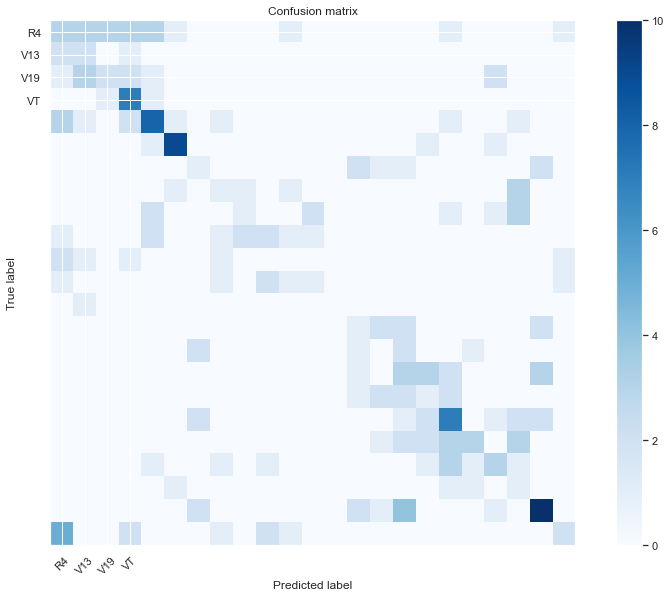

In [67]:
from sklearn.metrics import confusion_matrix
GrowthStages= ['R4', 'V13','V19','VT'] 
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(GrowthStages))
    plt.xticks(tick_marks, GrowthStages, rotation=45)
    plt.yticks(tick_marks, GrowthStages)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_test,y_pred_rf)
np.set_printoptions(precision=1)
print('Confusion matrix, landsat_NDVI+3Weather')
print(cm)
plt.figure()
plot_confusion_matrix(cm, GrowthStages)

# one VI and weather parameters 

In [73]:
df.columns


Index(['Unnamed: 0', 'B1', 'B2', 'B3', 'B4', 'CVI', 'EVI', 'FID_1', 'GCVI',
       'ID', 'NDVI', 'NGI', 'Q1', 'Q2', 'Q3', 'Q4', 'Shape_Area', 'Shape_Le_1',
       'Shape_Leng', 'stage', 'constant', 'crop', 'latitude', 'longitude',
       'pr', 'tmmn', 'tmmx', 'vpd', 'year', '.geo'],
      dtype='object')

In [74]:
df= df.drop (['Unnamed: 0', 'Shape_Area', 'Shape_Leng', 'Shape_Le_1','FID_1','crop','.geo'], axis=1)

In [75]:
df.columns

Index(['B1', 'B2', 'B3', 'B4', 'CVI', 'EVI', 'GCVI', 'ID', 'NDVI', 'NGI', 'Q1',
       'Q2', 'Q3', 'Q4', 'stage', 'constant', 'latitude', 'longitude', 'pr',
       'tmmn', 'tmmx', 'vpd', 'year'],
      dtype='object')

In [76]:

df = df[['stage','B1', 'B2', 'B3', 'B4',  
         'Q1','Q2', 'Q3', 'Q4',
         'CVI', 'EVI', 'GCVI', 'NDVI', 'NGI',  
         'pr', 'tmmn', 'tmmx', 'vpd',
         'ID','constant',  'latitude', 'longitude',
       'year']]

In [77]:
Xvw= df.iloc[:,[12,15,16,17]]
Yvw = df.iloc[:,0]
print (Xvw)

         NDVI        tmmn        tmmx       vpd
0    0.535351  294.165540  306.765526  1.693106
1    0.474464  294.299988  307.100006  1.750000
2    0.329791  294.273490  307.073500  1.744699
3    0.638846  288.700012  304.000000  1.820000
4    0.642638  288.700012  304.000000  1.820000
..        ...         ...         ...       ...
778  0.286154  288.299988  304.000000  1.680000
779  0.251522  279.700014  295.833888  0.989960
780  0.259609  279.700012  295.704874  0.980486
781  0.259138  279.700012  295.706693  0.980668
782  0.276506  279.826190  295.847597  0.990000

[783 rows x 4 columns]


In [78]:
# split data into train and test sets
seed = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(Xvw, Yvw, test_size=test_size, random_state=seed)


#Random Forest
clf_RF=RandomForestClassifier(bootstrap=True,
                              #max_depth=50,
 #max_features= 7,
 #min_samples_leaf= 2,
 #min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(X_train, y_train)

print(X_train)
y_pred_rf = clf_RF.predict(X_test)

report = metrics.classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
#report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_RF_sentinel_match.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred_rf)

print(cm)


         NDVI        tmmn        tmmx       vpd
563  0.742390  288.726226  303.782486  1.667377
11   0.597339  288.504864  303.899994  1.780000
214  0.597379  278.835376  294.929224  0.870000
88   0.484529  292.982096  306.182108  1.508210
639  0.761038  293.578782  306.057558  1.541511
..        ...         ...         ...       ...
715  0.717458  290.799988  305.000000  1.530000
767  0.588864  294.200012  309.000000  2.370000
72   0.515728  295.146301  310.464192  2.479258
235  0.830132  292.399994  303.100006  1.110000
37   0.362395  287.200012  301.100006  1.240000

[548 rows x 4 columns]
              precision    recall  f1-score     support
R1             0.391304  0.473684  0.428571   19.000000
R2             0.250000  0.400000  0.307692    5.000000
R3             0.600000  0.545455  0.571429   11.000000
R4             0.583333  0.777778  0.666667    9.000000
R5             0.812500  0.722222  0.764706   18.000000
R6             1.000000  0.583333  0.736842   12.000000
V1      

/Users/luciananieto/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luciananieto/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SMOTE test 

In [665]:
##pip install imbalanced-learn

Class=15, n=4 (1.170%)
Class=16, n=6 (1.754%)
Class=6, n=16 (4.678%)
Class=7, n=2 (0.585%)
Class=8, n=16 (4.678%)
Class=9, n=29 (8.480%)
Class=10, n=7 (2.047%)
Class=11, n=8 (2.339%)
Class=12, n=3 (0.877%)
Class=13, n=12 (3.509%)
Class=14, n=7 (2.047%)
Class=17, n=8 (2.339%)
Class=0, n=4 (1.170%)
Class=1, n=13 (3.801%)
Class=2, n=12 (3.509%)
Class=3, n=31 (9.064%)
Class=4, n=50 (14.620%)
Class=5, n=114 (33.333%)


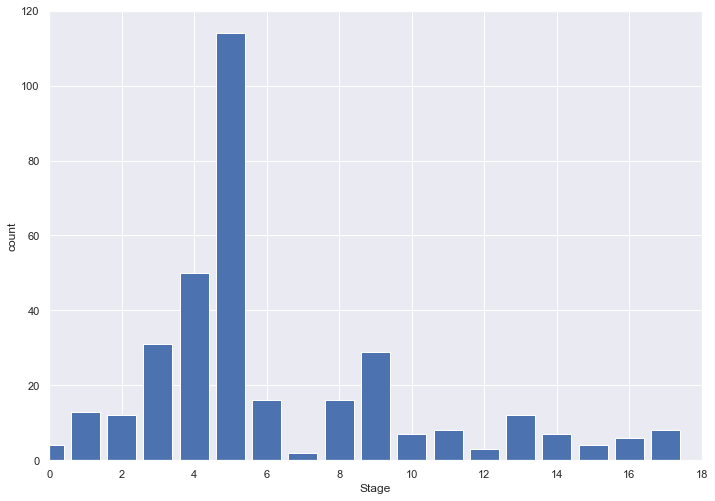

In [739]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = df.values
# split into input and output elements

# label encode the target variable
y = LabelEncoder().fit_transform(Y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.xlabel('Stage')

plt.ylabel('count')
#plt.title('Histogram of IQ')

plt.xlim(0,18)
plt.ylim(0, 120)

pyplot.show()



In [740]:
# transform the dataset
XvwSM= df.iloc[:,1:20]
YvwSM = df.iloc[:,0]
print (XvwSM)

     constant   latitude   longitude          B1           B2           B3  \
0         151  37.587428 -101.521631  760.845348  1142.068462  1480.411582   
1         152  37.647269 -101.438025  944.406772  1413.101128  1847.019765   
2         153  37.581344 -101.640183  888.509264  1269.246296  1607.800076   
3         153  37.499269 -101.576290  942.308931  1399.002046  1858.317705   
4         154  37.406999 -101.622192  908.680951  1324.345643  1734.844414   
..        ...        ...         ...         ...          ...          ...   
337       285  37.439070 -101.575963  319.567649   525.897662   642.518203   
338       290  37.529591 -101.612839  295.005396   503.946842   559.534064   
339       290  37.555519 -101.626120  328.920389   534.701362   665.321451   
340       290  37.461696 -101.551851  475.155297   709.940897   942.498181   
341       290  37.420936 -101.658116  433.815741   662.019921   918.931543   

              B4          Q1          Q2     Q3          Q4    

In [745]:
# split data into train and test sets
seed = 7
test_size = 0.30
XSM_train, XSM_test, ySM_train, ySm_test = train_test_split(XvwSM, YvwSM, test_size=test_size, random_state=seed)


In [752]:


# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE(k_neighbors=2)
XSM_train, y = oversample.fit_resample(XSM_train, ySM_train)
print(XSM_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

      constant   latitude   longitude          B1           B2           B3  \
0          251  37.297485 -101.651033  410.029967   757.309961   714.265523   
1          262  37.457459 -101.612441  331.641895   601.975760   587.643385   
2          158  37.340706 -101.416000  747.380307  1099.787779  1395.152286   
3          242  37.393762 -101.457724  227.040705   495.371457   384.195310   
4          242  37.399423 -101.485034  273.140676   564.325697   479.289119   
...        ...        ...         ...         ...          ...          ...   
1338       185  37.427981 -101.402799  786.298931  1152.721645  1397.254455   
1339       186  37.468331 -101.516606  796.814218  1143.924566  1433.781824   
1340       185  37.435777 -101.424345  787.082149  1149.284177  1400.785617   
1341       187  37.459813 -101.510212  938.533017  1370.428404  1806.538163   
1342       187  37.455831 -101.500504  933.730929  1363.976182  1794.535731   

               B4          Q1          Q2          

TypeError: %d format: a number is required, not str

In [747]:
#XGBoost


# fit model no training data
model = XGBClassifier()
model.fit(XSM_train, ySM_train)
# make predictions for test data
ySM_pred = model.predict(XSM_test)

report1 = metrics.classification_report(ySM_test,ySM_pred, output_dict=True)
report_rf1 = pd.DataFrame(report1).transpose()

#save report
report_rf1.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_XG_all_balance.csv',index=False)
print(report_rf1)
cm1 =metrics.confusion_matrix(ySM_test,ySM_pred)

print(cm1)

/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score     support
R1             0.000000  0.000000  0.000000    1.000000
R2             1.000000  0.750000  0.857143    4.000000
R3             0.500000  1.000000  0.666667    3.000000
R4             1.000000  1.000000  1.000000    9.000000
R5             1.000000  1.000000  1.000000   13.000000
R6             1.000000  1.000000  1.000000   35.000000
V10            1.000000  1.000000  1.000000    5.000000
V12            1.000000  1.000000  1.000000    3.000000
V13            1.000000  1.000000  1.000000    9.000000
V14            0.000000  0.000000  0.000000    2.000000
V15            1.000000  1.000000  1.000000    4.000000
V16            0

/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [748]:
#Random Forest
clf_RF=RandomForestClassifier(bootstrap=True,
                              #max_depth=50,
 #max_features= 7,
 #min_samples_leaf= 2,
 #min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(XSM_train, ySM_train)

print(XSM_train)
ySM_pred_rf = clf_RF.predict(XSM_test)

report = metrics.classification_report(ySM_test,ySM_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_RF_all_balance.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(ySM_test,ySM_pred_rf)

print(cm)



      constant   latitude   longitude          B1           B2           B3  \
0          251  37.297485 -101.651033  410.029967   757.309961   714.265523   
1          262  37.457459 -101.612441  331.641895   601.975760   587.643385   
2          158  37.340706 -101.416000  747.380307  1099.787779  1395.152286   
3          242  37.393762 -101.457724  227.040705   495.371457   384.195310   
4          242  37.399423 -101.485034  273.140676   564.325697   479.289119   
...        ...        ...         ...         ...          ...          ...   
1338       185  37.427981 -101.402799  786.298931  1152.721645  1397.254455   
1339       186  37.468331 -101.516606  796.814218  1143.924566  1433.781824   
1340       185  37.435777 -101.424345  787.082149  1149.284177  1400.785617   
1341       187  37.459813 -101.510212  938.533017  1370.428404  1806.538163   
1342       187  37.455831 -101.500504  933.730929  1363.976182  1794.535731   

               B4          Q1          Q2          

/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [568]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.20, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print (X_VI)


clf_RF=RandomForestClassifier(bootstrap=True,
 ##max_depth=50,
 ##max_features= 7,
 ##min_samples_leaf= 2,
 ##min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_rf = clf_RF.predict(X_test)

y_pred2_rf = clf_RF.predict(X_train)

report = metrics.classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()
#report_rf.to_csv('report_rf_2019_7.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred_rf)

print(cm)

(273, 20)
(69, 20)
             Q1     Q3          Q4       NGI
0    100.000000  255.0  255.000000  0.228195
1      2.377662    1.0    2.000000  0.220613
2    100.000000  255.0  255.000000  0.227324
3    100.000000  255.0  255.000000  0.220752
4    100.000000  255.0  255.000000  0.229614
..          ...    ...         ...       ...
337    1.000000    1.0   13.000000  0.170693
338    1.000000    1.0   22.000000  0.155327
339    1.000000    1.0   23.000000  0.171105
340    1.000000    1.0   20.000000  0.187739
341    1.000000    1.0   18.586082  0.181879

[342 rows x 4 columns]
              precision    recall  f1-score    support
0              0.000000  0.000000  0.000000   2.000000
1              0.600000  0.600000  0.600000   5.000000
2              0.000000  0.000000  0.000000   0.000000
3              1.000000  1.000000  1.000000   6.000000
4              1.000000  1.000000  1.000000   6.000000
5              1.000000  1.000000  1.000000  29.000000
6              1.000000  1.00000

/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using the data from landsat

In [39]:
df1 = pd.read_csv ("/Users/luciananieto/2021/Planet_2021/data2017_ok.csv")

In [40]:
df1.columns

Index(['Unnamed: 0', 'B1', 'B10', 'B11', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'EVI', 'GCVI', 'GVMI', 'NDVI', 'NDWI', 'constant', 'mean', 'pr', 'tmmn',
       'tmmx', 'vpd', 'Crop_Growt', 'DOY'],
      dtype='object')

In [43]:
df2= df1.drop(['Unnamed: 0','GVMI','GVMI'],axis=1)

In [44]:
df2.columns

Index(['B1', 'B10', 'B11', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'EVI', 'GCVI',
       'NDVI', 'NDWI', 'constant', 'mean', 'pr', 'tmmn', 'tmmx', 'vpd',
       'Crop_Growt', 'DOY'],
      dtype='object')

In [46]:
Xvw= df2.iloc[:,[11, 16,17,18]]
Yvw = df2.iloc[:,-2]
print (Xvw)
print(Yvw)

          NDVI        tmmn        tmmx       vpd
0     0.277684  293.198151  311.377594  2.789042
1     0.437356  293.198151  311.377594  2.789042
2     0.433607  293.198151  311.377594  2.789042
3     0.280731  293.188324  311.492828  2.800257
4     0.263402  293.188324  311.492828  2.800257
...        ...         ...         ...       ...
8817  0.424159  288.500339  306.943307  2.174080
8818  0.337226  288.513916  306.857971  2.160754
8819  0.447497  289.107544  307.133423  2.163937
8820  0.545275  289.889526  307.928497  2.277008
8821  0.525992  289.676804  307.767951  2.270031

[8822 rows x 4 columns]
0       ER
1       ER
2       ER
3       ER
4       ER
        ..
8817    LV
8818    LV
8819    LV
8820    LV
8821    LV
Name: Crop_Growt, Length: 8822, dtype: object


In [48]:

# split data into train and test sets
seed = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(Xvw, Yvw, test_size=test_size, random_state=seed)
print(X_train)

#Random Forest
clf_RF=RandomForestClassifier(bootstrap=True,
                              #max_depth=50,
 #max_features= 7,
 #min_samples_leaf= 2,
 #min_samples_split= 4,
 n_estimators= 50,random_state=0)
clf_RF.fit(X_train, y_train)

print(X_train)
y_pred_rf = clf_RF.predict(X_test)

report = metrics.classification_report(y_test,y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

#save report
report_rf.to_csv('/Users/luciananieto/2021/Planet_2021/Classification/Reports_python/report_RF_NDVI_W_LANDSAT.csv',index=False)
print(report_rf)
cm =metrics.confusion_matrix(y_test,y_pred_rf)

print(cm)



          NDVI        tmmn        tmmx       vpd
5009  0.725838  289.830231  304.002014  1.120082
3933  0.643355  293.049133  306.346893  1.758204
1998  0.299293  290.367568  309.196969  2.409878
4857  0.866918  291.002991  304.503174  1.232589
4846  0.273429  290.271942  304.369080  1.168623
...        ...         ...         ...       ...
2895  0.319941  293.233487  308.241633  2.179173
7813  0.587204  287.444500  306.574420  2.195222
905   0.209301  292.607941  311.838471  2.981302
5192  0.524670  289.748535  304.237701  1.143409
235   0.291999  293.698273  307.747162  1.848589

[6175 rows x 4 columns]
          NDVI        tmmn        tmmx       vpd
5009  0.725838  289.830231  304.002014  1.120082
3933  0.643355  293.049133  306.346893  1.758204
1998  0.299293  290.367568  309.196969  2.409878
4857  0.866918  291.002991  304.503174  1.232589
4846  0.273429  290.271942  304.369080  1.168623
...        ...         ...         ...       ...
2895  0.319941  293.233487  308.241633  2.17

Confusion matrix, landsat_NDVI+3Weather
[[  0  23   0  11  20  22  10  16  19]
 [ 20   9   3   7  54  42  25  22  21]
 [  0   3   4   4  20  15  10   3   2]
 [ 15   6   5  21  59  31  31  26  11]
 [ 30  48  14  35 111 157  50 124  44]
 [ 25  36  13  18 143  34  43 130  35]
 [ 12  26   4  21  93  49  15  26  25]
 [ 16  29   0  14 151 138  23 101  22]
 [ 31  27   1   3  43  35  30  28   4]]


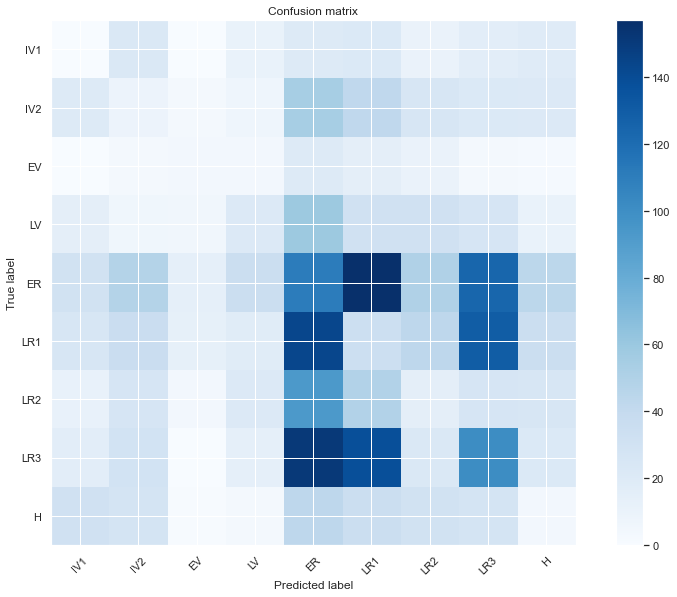

In [54]:
from sklearn.metrics import confusion_matrix
GrowthStages= ['IV1','IV2','EV','LV','ER', 'LR1', 'LR2','LR3','H'] 
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(GrowthStages))
    plt.xticks(tick_marks, GrowthStages, rotation=45)
    plt.yticks(tick_marks, GrowthStages)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_test,y_pred_rf)
np.set_printoptions(precision=1)
print('Confusion matrix, landsat_NDVI+3Weather')
print(cm)
plt.figure()
plot_confusion_matrix(cm, GrowthStages)